In [117]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [118]:
df_2020 = pd.read_csv('2020 Cases Only.csv', low_memory=False)
df_2021 = pd.read_csv('2021 Cases Only.csv', low_memory = False)

In [119]:
df_all = df_2020.append(df_2021)

In [120]:
df_all.head()

,OBJECTID,County,Age,Age_group,Gender,Jurisdicti,Travel_rel,Origin,EDvisit,Hospitaliz,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId2,ObjectId
0,NaN,Dade,21.0,15-24 years,Female,FL resident,No,NaN,NaN,NO,NaN,Yes,NaN,2020/05/08 05:00:00+00,5/7/2020,2020/05/08 05:00:00+00,248771.0,NaN
1,NaN,Pinellas,18.0,15-24 years,Female,FL resident,No,NaN,NaN,NO,NaN,Yes,NaN,2020/12/30 05:00:00+00,12/30/2020,2020/12/30 05:00:00+00,337190.0,NaN
2,NaN,Pinellas,23.0,15-24 years,Female,FL resident,No,NaN,NaN,NO,NaN,Yes,NaN,2020/12/04 05:00:00+00,12/4/2020,2020/12/04 05:00:00+00,310467.0,NaN
3,NaN,Pinellas,27.0,25-34 years,Female,FL resident,No,NaN,NaN,NO,NaN,Yes,NaN,2020/12/01 05:00:00+00,12/1/2020,2020/12/01 05:00:00+00,219261.0,NaN
4,NaN,Pinellas,29.0,25-34 years,Female,FL resident,No,NaN,NaN,NO,NaN,Yes,NaN,2020/12/18 05:00:00+00,12/18/2020,2020/12/18 05:00:00+00,219525.0,NaN


In [121]:
df_dade = df_all[df_all['County'] == 'Dade']
df_orange = df_all[df_all['County'] == 'Orange']

In [122]:
c_dade = df_dade.groupby(['EventDate']).count()
c_orange = df_orange.groupby(['EventDate']).count()

In [123]:
type(c_dade.index[0])

str

In [124]:
c_dade.index = pd.to_datetime(c_dade.index, format="%m/%d/%Y")
c_orange.index = pd.to_datetime(c_orange.index, format="%m/%d/%Y")

In [125]:
type(c_dade.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [126]:
c_sorted_dade = c_dade.sort_index(axis='index', ascending=True)
c_sorted_orange = c_orange.sort_index(axis='index', ascending=True)

In [127]:
c_sorted_dade['Date'] =c_sorted_dade.index.values
c_sorted_orange['Date'] =c_sorted_orange.index.values

In [128]:
c_sorted_dade['Daily Cases'] = c_sorted_dade['County']
c_sorted_orange['Daily Cases'] = c_sorted_orange['County']

In [129]:
c_sorted_dade['Moving Average'] = c_sorted_dade['County'].rolling(5, min_periods=0).mean()
c_sorted_orange['Moving Average'] = c_sorted_orange['County'].rolling(5, min_periods=0).mean()

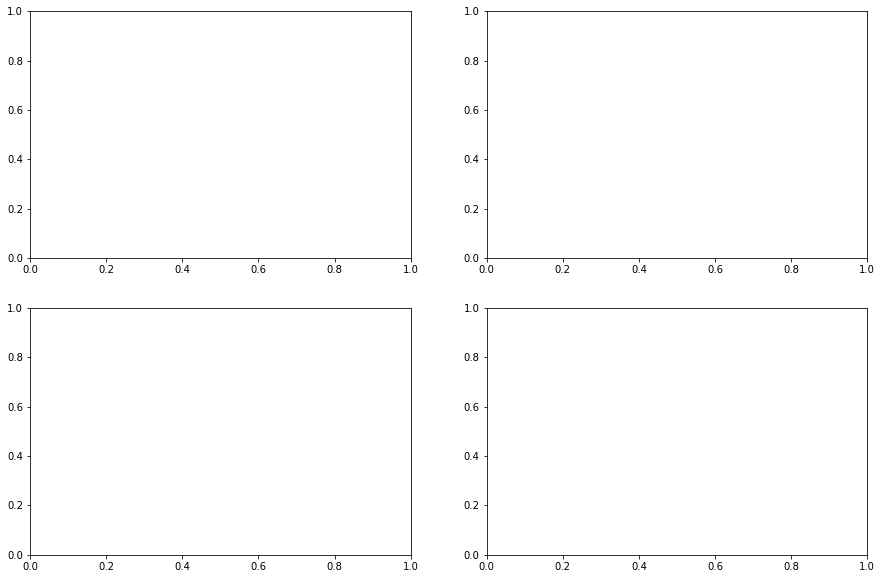

In [130]:
fig, h_axes = plt.subplots(2,2,figsize=[15,10])

[]

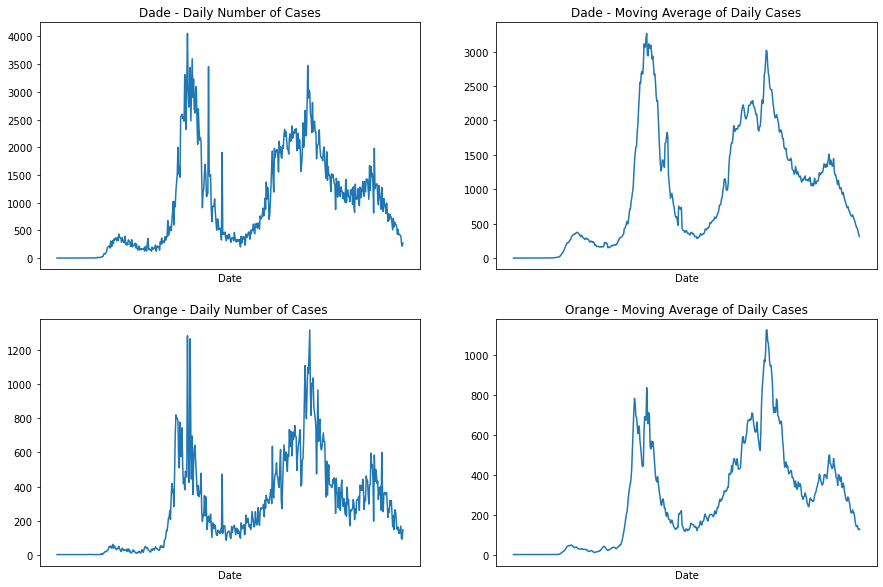

In [131]:
#Daily cases Dade county
plt.sca(h_axes[0,0])
plt.plot(c_sorted_dade['Date'], c_sorted_dade['Daily Cases'])
h_axes[0,0].set_title('Dade - Daily Number of Cases')
h_axes[0,0].set_xlabel('Date')
h_axes[0,0].set_xticks([])

#Moving Averages Dade County
plt.sca(h_axes[0,1])
plt.plot(c_sorted_dade['Date'], c_sorted_dade['Moving Average'])
h_axes[0,1].set_title('Dade - Moving Average of Daily Cases')
h_axes[0,1].set_xlabel('Date')
h_axes[0,1].set_xticks([])


#Daily cases Orange county
plt.sca(h_axes[1,0])
plt.plot(c_sorted_orange['Date'], c_sorted_orange['Daily Cases'])
h_axes[1,0].set_title('Orange - Daily Number of Cases')
h_axes[1,0].set_xlabel('Date')
h_axes[1,0].set_xticks([])

#Moving Averages Orange County
plt.sca(h_axes[1,1])
plt.plot(c_sorted_orange['Date'], c_sorted_orange['Moving Average'])
h_axes[1,1].set_title('Orange - Moving Average of Daily Cases')
h_axes[1,1].set_xlabel('Date')
h_axes[1,1].set_xticks([])